In [1]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
scope = "user-top-read" #define your desired goal
username = "arnav7"
client_id="1ef0a322e0d340a89e4225bf2139ccc3"
client_secret = "5d6a540cd8a64ad0bb0d1708584df8ae"
redirect_uri = "http://localhost:7777/callback"

In [3]:
token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=client_secret,     
                                   redirect_uri=redirect_uri)

In [4]:
sp = spotipy.Spotify(auth=token)

In [5]:
ranges = ["short_term", "medium_term", "long_term"]

for sp_range in ranges:
    print(sp_range + "\n")
    results = sp.current_user_top_tracks(time_range=sp_range, limit=10)
    for i, item in enumerate(results["items"]):
        print(str(i+1) + " " + item["name"] + " // " + item["artists"][0]["name"])
    print("\n")


short_term

1 Does It Make You Feel Good? // Joesef
2 Out Of My Head // Mac DeMarco
3 I Wonder Why // Joesef
4 Karma Police // Scary Pockets
5 Something // Vulfpeck
6 With Love To An Ex (feat. Moonchild Sanelly) // Gorillaz
7 The Recipe // SiR
8 New York, New York (Live) // Jon Batiste
9 MLS (feat. JPEGMAFIA and CHAI) // Gorillaz
10 Old Fashioned // Bruno Major


medium_term

1 Herside Story // GoldLink
2 Tribe (with J. Cole) // Bas
3 If You’re Too Shy (Let Me Know) // The 1975
4 Sunblind // Fleet Foxes
5 The Tracks Of My Tears // Smokey Robinson & The Miracles
6 Great Dane - Radio Edit // Cosmo Pyke
7 The Recipe // SiR
8 CUT EM IN (feat. Rick Ross) // Anderson .Paak
9 Does It Make You Feel Good? // Joesef
10 Out Of My Head // Mac DeMarco


long_term

1 Freaking Out the Neighborhood // Mac DeMarco
2 If I Ever Get Around To Living // John Mayer
3 Still Beating // Mac DeMarco
4 Waitin' On The Day // John Mayer
5 SUGAR // BROCKHAMPTON
6 My 1-Bedroom // Theo Katzman
7 What Did You Mean (Wh

In [6]:
alltime = sp.current_user_top_tracks(time_range="long_term", limit=50)["items"]

In [13]:
df = pd.DataFrame({"Track name":[], "Track ID":[], "popularity":[]})

In [14]:
alltime[0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [15]:
for i, track in enumerate(alltime):
    df.loc[i] = [track["name"], track["id"], track["popularity"]]

In [16]:
df.head()

,Track name,Track ID,popularity
0,Freaking Out the Neighborhood,25SJaCCPiosugnlY53VhRG,73.0
1,If I Ever Get Around To Living,6Oi3mUl8WwfTVRqEwByZ7R,49.0
2,Still Beating,2N4idqj9TT3HnH2OFT9j0v,67.0
3,Waitin' On The Day,58ImA5yX8b5UkLy9MDXwWO,57.0
4,SUGAR,6U0FIYXCQ3TGrk4tFpLrEA,81.0


In [17]:
test = df["Track ID"][0]

In [18]:
sp.audio_features(tracks=[test])

[{'danceability': 0.565,
  'energy': 0.832,
  'key': 8,
  'loudness': -5.751,
  'mode': 0,
  'speechiness': 0.108,
  'acousticness': 0.0639,
  'instrumentalness': 0.0291,
  'liveness': 0.386,
  'valence': 0.847,
  'tempo': 143.302,
  'type': 'audio_features',
  'id': '25SJaCCPiosugnlY53VhRG',
  'uri': 'spotify:track:25SJaCCPiosugnlY53VhRG',
  'track_href': 'https://api.spotify.com/v1/tracks/25SJaCCPiosugnlY53VhRG',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/25SJaCCPiosugnlY53VhRG',
  'duration_ms': 173889,
  'time_signature': 4}]

In [19]:
features = ["danceability", "energy", "loudness", "acousticness", "instrumentalness", "liveness", "tempo"]

for i in range(df.shape[0]):
    track_id = df["Track ID"][i]
    feature_dictionary = sp.audio_features(tracks=[track_id])[0]
    for feature in features:
        df.loc[i, feature] = feature_dictionary[feature]

In [20]:
df.head()

,Track name,Track ID,popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,tempo
0,Freaking Out the Neighborhood,25SJaCCPiosugnlY53VhRG,73.0,0.565,0.832,-5.751,0.0639,0.0291,0.386,143.302
1,If I Ever Get Around To Living,6Oi3mUl8WwfTVRqEwByZ7R,49.0,0.559,0.468,-12.738,0.5320,0.1290,0.257,80.014
2,Still Beating,2N4idqj9TT3HnH2OFT9j0v,67.0,0.709,0.496,-10.528,0.5810,0.1950,0.151,78.477
3,Waitin' On The Day,58ImA5yX8b5UkLy9MDXwWO,57.0,0.656,0.438,-8.631,0.7970,0.0522,0.142,119.996
4,SUGAR,6U0FIYXCQ3TGrk4tFpLrEA,81.0,0.453,0.538,-8.212,0.4490,0.0000,0.190,122.973


Text(0.5, 1.0, "Arnav's 50 all-time top tracks")

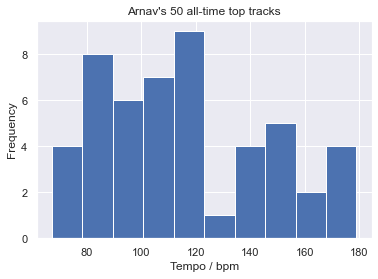

In [37]:
plt.figure()
plt.hist(df["tempo"])
plt.xlabel("Tempo / bpm")
plt.ylabel("Frequency")
plt.title("Arnav's 50 all-time top tracks")

(array([ 2.,  2.,  8., 10.,  8., 12.,  2.,  1.,  4.,  1.]),
 array([0.1   , 0.1847, 0.2694, 0.3541, 0.4388, 0.5235, 0.6082, 0.6929,
        0.7776, 0.8623, 0.947 ]),
 <a list of 10 Patch objects>)

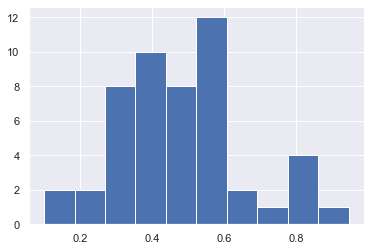

In [23]:
plt.hist(df["energy"])

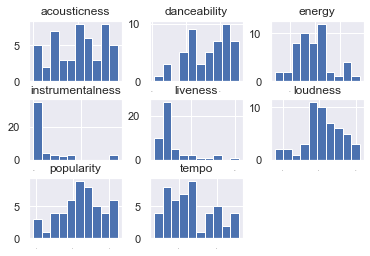

In [35]:
df.hist(xlabelsize=0);

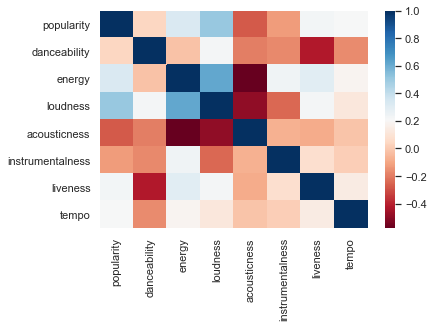

In [36]:
sns.heatmap(df.corr(), cmap=plt.cm.get_cmap("RdBu"))

In [186]:
df

,Track name,Track ID,Popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,tempo
0,Freaking Out the Neighborhood,25SJaCCPiosugnlY53VhRG,73.0,0.565,0.832,-5.751,0.0639,0.0291,0.386,143.302
1,Still Beating,2N4idqj9TT3HnH2OFT9j0v,67.0,0.709,0.496,-10.528,0.581,0.195,0.151,78.477
2,If I Ever Get Around To Living,6Oi3mUl8WwfTVRqEwByZ7R,49.0,0.559,0.468,-12.738,0.532,0.129,0.257,80.014
3,Waitin' On The Day,58ImA5yX8b5UkLy9MDXwWO,57.0,0.656,0.438,-8.631,0.797,0.0522,0.142,119.996
4,SUGAR,6U0FIYXCQ3TGrk4tFpLrEA,81.0,0.453,0.538,-8.212,0.449,0,0.19,122.973
5,My 1-Bedroom,1wkU8NjA4JzwszL61vCmnu,35.0,0.552,0.323,-11.672,0.808,0.000284,0.102,176.514
6,What Did You Mean (When You Said Love),5UluDwGczz51tTGq2E4PR1,23.0,0.819,0.44,-10.801,0.213,0.0364,0.102,116.717
7,Love Is a Beautiful Thing,59qmUODXmHXiWwvG8WdzEW,49.0,0.805,0.314,-11.009,0.32,1.28e-06,0.112,114.353
8,Called To Tell You,5R7smNPfVbGs07hdG9cPbR,24.0,0.863,0.469,-10.161,0.634,6.42e-05,0.085,118.128
9,Back Pocket,1DrlLvlYd1FIjNavRm6NdX,63.0,0.839,0.585,-7.738,0.478,0.00281,0.0435,89.821
